# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [ ]:
name = "黃宇文"
student_id = "B06201029"

---

# Exercise 1 - Secant

### Use the secant method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define a function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$.

In [2]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        return np.cosh(x) + np.cos(x) - c
    return f

Pass the following assertion.

In [3]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1

### 2. Implement the algorithm

In [4]:
def secant(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    interval: list
        The initial interval to search
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'
    
    # Set the initial condition
    num_iterations = 0
    a_next, b_next = a, b
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'x_error': [], 'y_error': []}
    
    while True:
        # Find the next point
        d_x = -func(a_next)*(b_next-a_next)/(func(b_next)-func(a_next))
        c = a_next + d_x
                
        # Evaluate the error
        x_error = abs(d_x)
        y_error = abs(func(c))

        if report_history:
            history['estimation'].append(c)
            history['x_error'].append(x_error)
            history['y_error'].append(y_error)

        # Satisfy the criterion and stop
        if x_error < tolerance or y_error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return (c, history) if report_history else c
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            
            num_iterations += 1
            
            # Find the next interval
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            else:
                return (c, history) if report_history else c
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            return (c, history) if report_history else c

Test your implementation with the assertion below.

In [5]:
root = secant(lambda x: x**2 - x - 1, [1.0, 2.0], max_iterations=100, tolerance=1e-7, report_history=False)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

Found solution after 8 iterations.


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

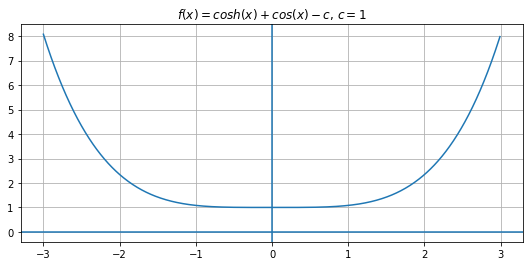

In [6]:
c = 1
f = g(c)

search_range = np.arange(-3.0, 3.0, 0.01)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [6]:
root = None

In [7]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$.I f it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

The function $cosh(x)+cos(x)-1$ is always positive. The product of functions of any two intervals will never less than zero, thus it has no roots.

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

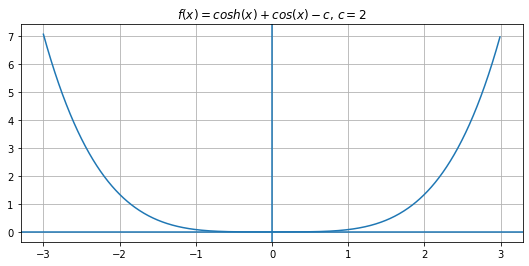

In [11]:
c = 2
f = g(c)

search_range = np.arange (-3.0, 3.0, 0.01)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
root = 0

In [9]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step.Otherwise, state the reason why the method failed on this case.

As the root is zero, $func(a) \times func(b) \leq 0$ or $func(a) \times func(b) \geq 0$. It does not satisfy the prerequisities.

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

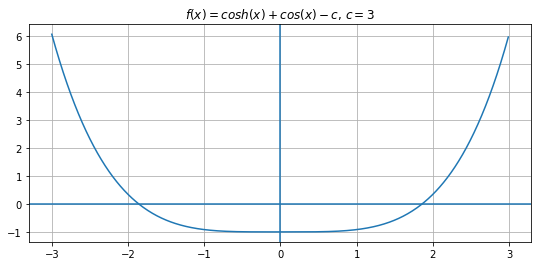

In [29]:
c = 3
f = g(c)

search_range = np.arange(-3.0, 3.0, 0.01)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [30]:
root_1 = secant(g(3), [1.0, 2.0], max_iterations=100, tolerance=1e-7, report_history=False)
root_2 = secant(g(3), [-2.0, -1.0], max_iterations=100, tolerance=1e-7, report_history=False)
root = root_1, root_2

Found solution after 7 iterations.
Found solution after 7 iterations.


In [31]:
print('My estimation of root:', root)


My estimation of root: (1.8579208021569058, -1.8579208021569058)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [32]:
solution, history = secant(
    g(3),
    [1.0, 2.0],
    max_iterations=100,
    tolerance=1e-10,
    report_history=True
)
print(solution)

Found solution after 10 iterations.
1.85792082911445


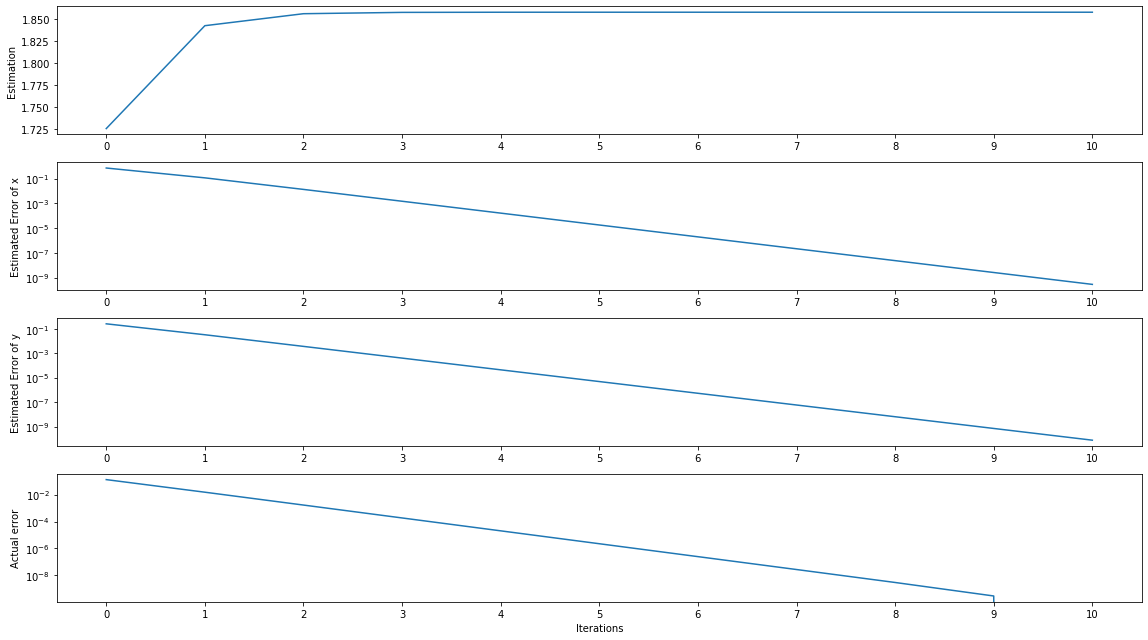

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(16, 9))
ax1, ax2, ax3, ax4 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error of x (log(error of x)) in history
ax2.plot(iterations, history['x_error'])
ax2.set_ylabel('Estimated Error of x')
ax2.set_yscale('log')

# Plot the estimation error of y (log(error of y)) in history
ax3.plot(iterations, history['y_error'])
ax3.set_ylabel('Estimated Error of y')
ax3.set_yscale('log')

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-solution)
ax4.plot(iterations, actual_error)
ax4.set_ylabel('Actual error')
ax4.set_yscale('log')
ax4.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

In [34]:
solution, history = secant(
    g(3),
    [-2.0, -1.0],
    max_iterations=100,
    tolerance=1e-10,
    report_history=True
)
print(solution)

Found solution after 10 iterations.
-1.85792082911445


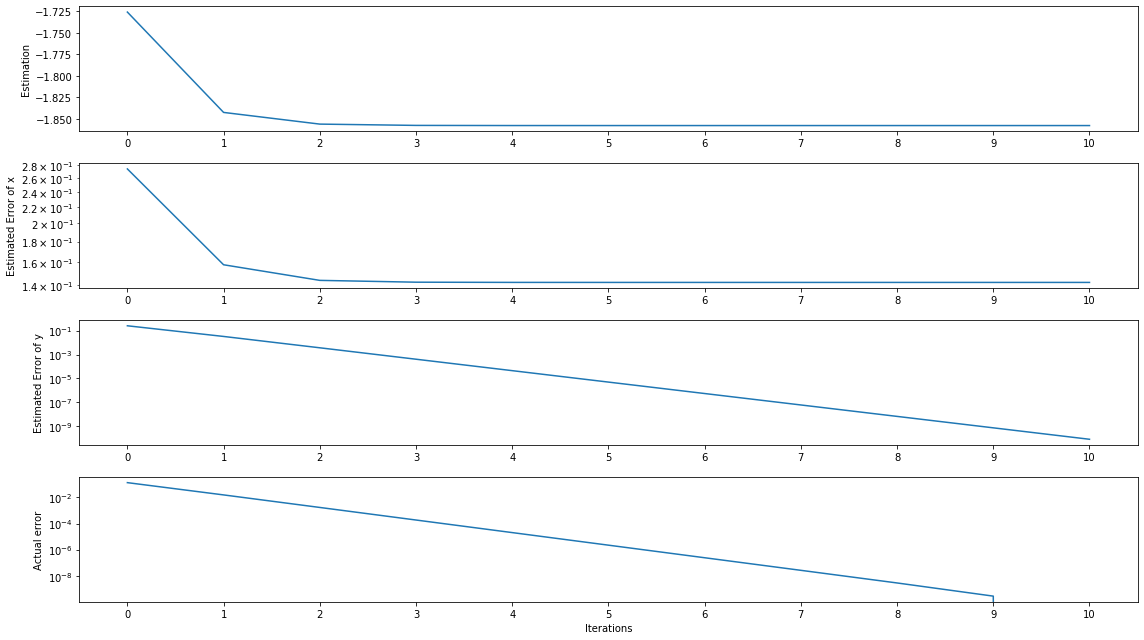

In [35]:
fig, axes = plt.subplots(4, 1, figsize=(16, 9))
ax1, ax2, ax3, ax4 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error of x (log(error of x)) in history
ax2.plot(iterations, history['x_error'])
ax2.set_ylabel('Estimated Error of x')
ax2.set_yscale('log')

# Plot the estimation error of y (log(error of y)) in history
ax3.plot(iterations, history['y_error'])
ax3.set_ylabel('Estimated Error of y')
ax3.set_yscale('log')

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-solution)
ax4.plot(iterations, actual_error)
ax4.set_ylabel('Actual error')
ax4.set_yscale('log')
ax4.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

For $c=1$, the function does not satisfy the prerequisties.\
For $c=2$, the function cut the $x$ axis at only one point.\
For $c=3$, the results agree with the theoretical analysis. Secant method has linear convergence.